# DATA ACQUISITION AND DESCRIPTION

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.JUNCTIONTYPE.unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)', nan,
       'Unknown', 'Ramp Junction'], dtype=object)

In [6]:
#data info
df.shape
df.describe()
df.columns
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [7]:
new_df = df[['X', 'Y', 'ADDRTYPE', 'LOCATION', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR', 'SEVERITYCODE']]
new_df['INCDATE'] = pd.to_datetime(new_df['INCDATE'])
new_df['YEAR'] = new_df['INCDATE'].dt.year
new_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,X,Y,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,SEVERITYCODE,YEAR
0,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN,NaN,N,2,2013
1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N,1,2006
2,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN,NaN,N,1,2004
3,-122.334803,47.604803,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Other,3,0,0,3,2013-03-29 00:00:00+00:00,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,NaN,N,1,2013
4,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN,NaN,N,2,2004


In [8]:
new_df.ADDRTYPE.unique()
new_df.COLLISIONTYPE.unique()
new_df.PEDROWNOTGRNT.unique()
new_df.SPEEDING.unique()
new_df.HITPARKEDCAR.unique()

array(['N', 'Y'], dtype=object)

In [9]:
new_df['ROADCOND'].value_counts()
new_df['JUNCTIONTYPE'].value_counts()
new_df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [10]:
new_df.WEATHER.unique()
new_df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

# DATA CLEANING

In [11]:
new_df = new_df[new_df.ROADCOND != 'Other']
new_df = new_df[new_df.LIGHTCOND != 'Other']
new_df = new_df[new_df.ROADCOND != 'Standing Water']
new_df = new_df[new_df.ROADCOND != 'Sand/Mud/Dirt']
new_df = new_df[new_df.ROADCOND != 'Oil']
new_df = new_df[new_df.LIGHTCOND != 'Dark - Unknown Lighting']
new_df = new_df[new_df.COLLISIONTYPE != 'Pedestrian']
new_df = new_df[new_df.JUNCTIONTYPE != 'Ramp Junction']

new_df = new_df[new_df.COLLISIONTYPE != 'Cycles']
new_df = new_df[new_df.COLLISIONTYPE != 'Right Turn']
new_df = new_df[new_df.COLLISIONTYPE != 'Head On']
new_df = new_df[new_df.COLLISIONTYPE != 'Other']
new_df = new_df[new_df.ROADCOND != 'Unknown']
new_df = new_df[new_df.JUNCTIONTYPE != 'Unknown']
new_df = new_df[new_df.WEATHER != 'Unknown']
new_df = new_df[new_df.WEATHER != 'Fog/Smog/Smoke']
new_df = new_df[new_df.WEATHER != 'Sleet/Hail/Freezing Rain']
new_df = new_df[new_df.WEATHER != 'Blowing Sand/Dirt']
new_df = new_df[new_df.WEATHER != 'Severe Crosswind']
new_df = new_df[new_df.WEATHER != 'Partly Cloudy']
new_df = new_df[new_df.WEATHER != 'Other']
new_df = new_df[new_df.LIGHTCOND != 'Unknown']

In [12]:
new_df = new_df.dropna(subset=["ADDRTYPE","ROADCOND","LIGHTCOND","WEATHER","LOCATION","X","Y", "COLLISIONTYPE"],axis=0)
new_df.shape

(128131, 21)

In [13]:
new_df.INATTENTIONIND.unique()
new_df.UNDERINFL.unique()

array(['N', '0', '1', 'Y'], dtype=object)

In [14]:
# new_df['UNDERINFL'] = df['UNDERINFL'].replace(np.nan, 0, inplace = True)
#new_df['UNDERINFL'] = df['UNDERINFL'].replace('N', 0, inplace = True)
# new_df['UNDERINFL'] = df['UNDERINFL'].replace('0', 0, inplace = True)
# new_df['UNDERINFL'] = df['UNDERINFL'].replace('1', 1, inplace = True)
# new_df['UNDERINFL'] = df['UNDERINFL'].replace('Y', 1, inplace = True)
new_df["UNDERINFL"] = new_df["UNDERINFL"].replace(['N', '0', '1', 'Y'], [0,0,1,1])
new_df["UNDERINFL"] = new_df["UNDERINFL"].replace([np.nan], [0])

In [15]:
new_df["INATTENTIONIND"] = new_df["INATTENTIONIND"].replace([np.nan, 'Y'], [0,1])
new_df["SPEEDING"] = new_df["SPEEDING"].replace([np.nan, 'Y'], [0, 1])
new_df["PEDROWNOTGRNT"] = new_df["PEDROWNOTGRNT"].replace([np.nan, 'Y'], [0, 1])
new_df["HITPARKEDCAR"] = new_df["HITPARKEDCAR"].replace(['N', 'Y'], [0, 1])
new_df['LIGHTCOND'].value_counts()

Daylight                    87234
Dark - Street Lights On     33260
Dusk                         4309
Dawn                         1612
Dark - No Street Lights       932
Dark - Street Lights Off      784
Name: LIGHTCOND, dtype: int64

In [16]:
new_df.SPEEDING.unique()
print(new_df['SPEEDING'].value_counts())

0    123403
1      4728
Name: SPEEDING, dtype: int64


In [17]:
# new_df['UNDERINFL'] = new_df['UNDERINFL'].astype(int)
new_df.UNDERINFL.unique()
print(new_df['UNDERINFL'].value_counts())

0    122625
1      5506
Name: UNDERINFL, dtype: int64


In [18]:
new_df.INATTENTIONIND.unique()
print(new_df['INATTENTIONIND'].value_counts())
new_df.dtypes
new_df.head()

0    105315
1     22816
Name: INATTENTIONIND, dtype: int64


,X,Y,ADDRTYPE,LOCATION,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,SEVERITYCODE,YEAR
0,-122.323148,47.703140,Intersection,5TH AVE NE AND NE 103RD ST,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,0,2,2013
1,-122.347294,47.647172,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0,0,1,2006
2,-122.334540,47.607871,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,0,1,2004
4,-122.306426,47.545739,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,0,2,2004
5,-122.387598,47.690575,Intersection,24TH AVE NW AND NW 85TH ST,Angles,2,0,0,2,2019-04-20 00:00:00+00:00,At Intersection (intersection related),0,0,Clear,Dry,Daylight,0,0,0,1,2019


In [19]:
new_df['WEATHER'].value_counts()
new_df['SEVERITYCODE'].value_counts()

1    90937
2    37194
Name: SEVERITYCODE, dtype: int64

# DATA EXPLORATION

In [20]:
new_df.shape
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
new_df.columns
new_df.ADDRTYPE.value_counts()

Block           80455
Intersection    47676
Name: ADDRTYPE, dtype: int64

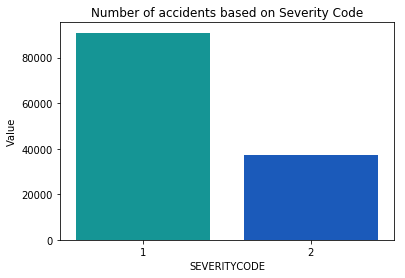

1    90937
2    37194
Name: SEVERITYCODE, dtype: int64


In [22]:
chart=sns.countplot(x='SEVERITYCODE', data=new_df, palette="winter_r")
plt.title("Number of accidents based on Severity Code")
plt.ylabel('Value', fontsize=10)
plt.show()
print(new_df["SEVERITYCODE"].value_counts())

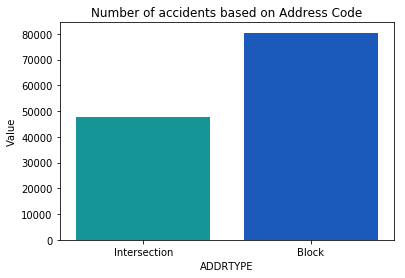

Block           80455
Intersection    47676
Name: ADDRTYPE, dtype: int64


In [23]:
chart=sns.countplot(x='ADDRTYPE', data=new_df, palette="winter_r")
plt.title("Number of accidents based on Address Code")
plt.ylabel('Value', fontsize=10)
plt.show()
print(new_df["ADDRTYPE"].value_counts())

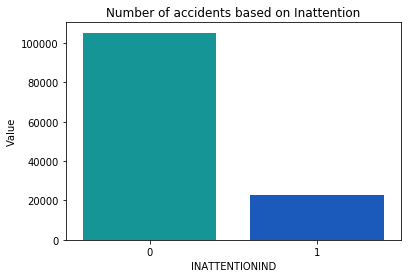

0    105315
1     22816
Name: INATTENTIONIND, dtype: int64


In [24]:
chart=sns.countplot(x='INATTENTIONIND', data=new_df, palette="winter_r")
plt.title("Number of accidents based on Inattention")
plt.ylabel('Value', fontsize=10)
plt.show()
print(new_df["INATTENTIONIND"].value_counts())

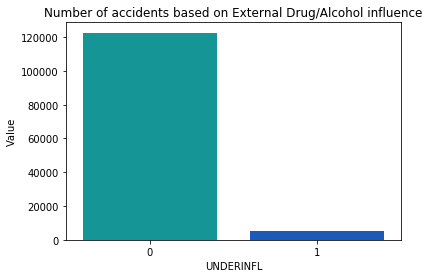

0    122625
1      5506
Name: UNDERINFL, dtype: int64


In [25]:
chart=sns.countplot(x='UNDERINFL', data=new_df, palette="winter_r")
plt.title("Number of accidents based on External Drug/Alcohol influence")
plt.ylabel('Value', fontsize=10)
plt.show()
print(new_df["UNDERINFL"].value_counts())

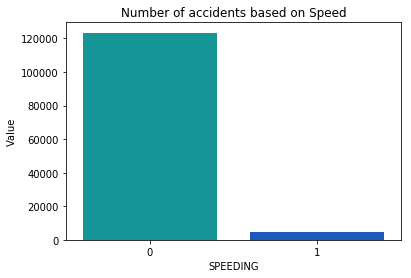

0    123403
1      4728
Name: SPEEDING, dtype: int64


In [26]:
chart=sns.countplot(x='SPEEDING', data=new_df, palette="winter_r")
plt.title("Number of accidents based on Speed")
plt.ylabel('Value', fontsize=10)
plt.show()
print(new_df["SPEEDING"].value_counts())

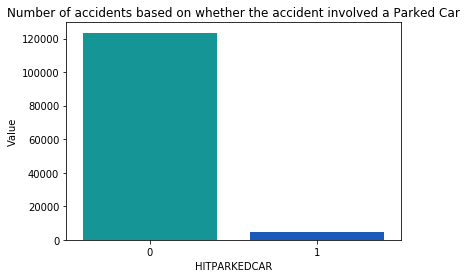

0    123483
1      4648
Name: HITPARKEDCAR, dtype: int64


In [27]:
chart=sns.countplot(x='HITPARKEDCAR', data=new_df, palette="winter_r")
plt.title("Number of accidents based on whether the accident involved a Parked Car")
plt.ylabel('Value', fontsize=10)
plt.show()
print(new_df["HITPARKEDCAR"].value_counts())

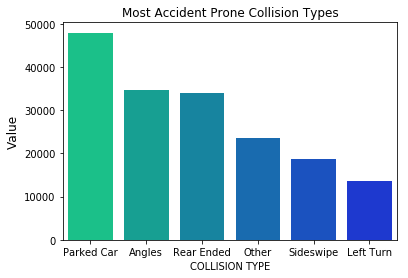

Angles        33450
Parked Car    33014
Rear Ended    31413
Sideswipe     17025
Left Turn     13229
Name: COLLISIONTYPE, dtype: int64


In [28]:
count  = df["COLLISIONTYPE"].value_counts()
count = count[:6,]
chart=sns.barplot(count.index, count.values, palette="winter_r")
plt.title("Most Accident Prone Collision Types")
plt.ylabel('Value', fontsize=12)
plt.xlabel('COLLISION TYPE')
plt.setp(chart.get_xticklabels(), rotation=0, horizontalalignment='center')
plt.show()
print(new_df["COLLISIONTYPE"].value_counts())

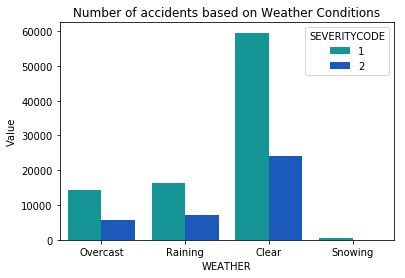

In [29]:
chart=sns.countplot(x='WEATHER', hue ='SEVERITYCODE', data=new_df, palette="winter_r")
plt.title("Number of accidents based on Weather Conditions")
plt.ylabel('Value', fontsize=10)
plt.show()

In [30]:
new_df.WEATHER.unique()

array(['Overcast', 'Raining', 'Clear', 'Snowing'], dtype=object)

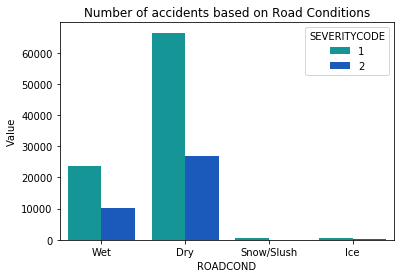

Dry           93169
Wet           33856
Ice             560
Snow/Slush      546
Name: ROADCOND, dtype: int64


In [31]:
chart=sns.countplot(x='ROADCOND', hue ='SEVERITYCODE', data=new_df, palette="winter_r")
plt.title("Number of accidents based on Road Conditions")
plt.ylabel('Value', fontsize=10)
plt.show()
print(new_df["ROADCOND"].value_counts())

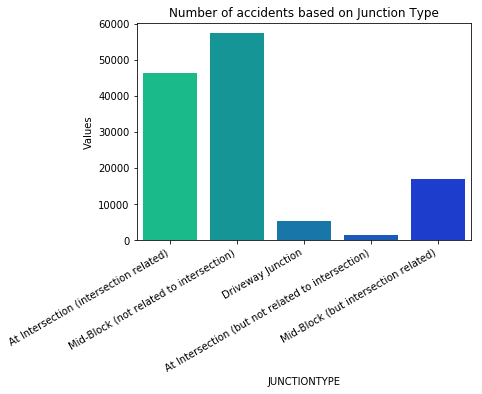

Mid-Block (not related to intersection)              57396
At Intersection (intersection related)               46201
Mid-Block (but intersection related)                 16782
Driveway Junction                                     5160
At Intersection (but not related to intersection)     1433
Name: JUNCTIONTYPE, dtype: int64


In [32]:
chart=sns.countplot(x='JUNCTIONTYPE', data=new_df, palette="winter_r")
plt.title("Number of accidents based on Junction Type")
plt.ylabel('Values', fontsize=10)
plt.setp(chart.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()
print(new_df["JUNCTIONTYPE"].value_counts())

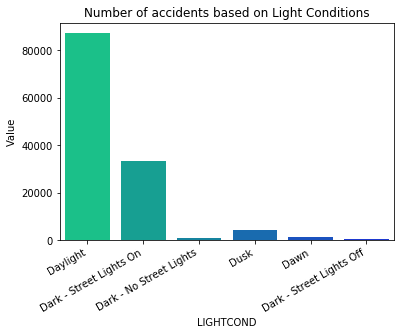

Daylight                    87234
Dark - Street Lights On     33260
Dusk                         4309
Dawn                         1612
Dark - No Street Lights       932
Dark - Street Lights Off      784
Name: LIGHTCOND, dtype: int64


In [33]:
chart=sns.countplot(x='LIGHTCOND', data=new_df, palette="winter_r")
plt.title("Number of accidents based on Light Conditions")
plt.ylabel('Value', fontsize=10)
plt.setp(chart.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()
print(new_df["LIGHTCOND"].value_counts())

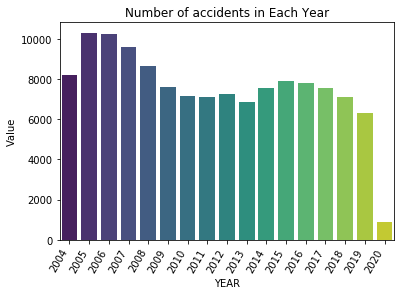

2005    10305
2006    10242
2007     9599
2008     8638
2004     8186
2015     7917
2016     7798
2009     7629
2017     7579
2014     7534
2012     7247
2010     7141
2011     7115
2018     7096
2013     6881
2019     6324
2020      900
Name: YEAR, dtype: int64


In [34]:
chart=sns.countplot(x='YEAR', data=new_df, palette = "viridis")
plt.title("Number of accidents in Each Year")
plt.ylabel('Value', fontsize=10)
plt.setp(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.show()
print(new_df["YEAR"].value_counts())

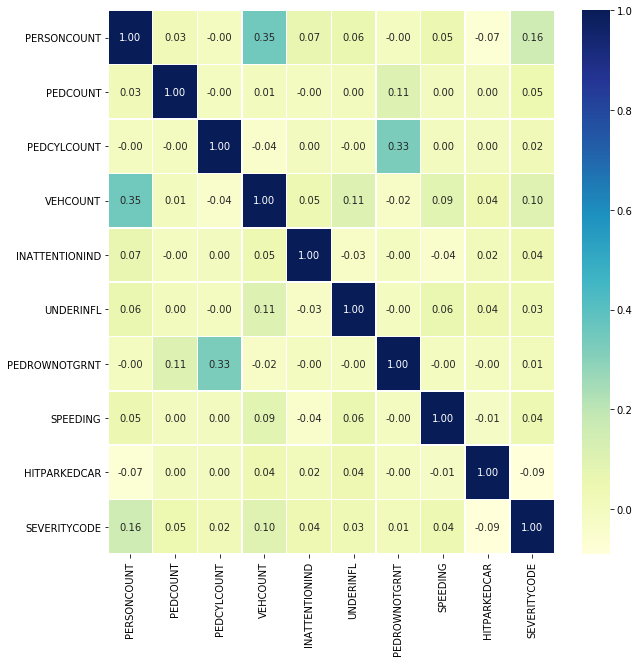

In [35]:
corr_df = new_df[['COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR', 'SEVERITYCODE']]
corr = corr_df.corr()
f, ax = plt.subplots (figsize=(10,10))

sns.heatmap(corr, annot=True,linewidth=0.5,fmt=".2f", ax=ax, cmap="YlGnBu")

In [36]:
import folium
df_map=new_df[['SEVERITYCODE', 'X','Y']]
df_map.dropna(inplace=True)
df_mapFinal=df_map.loc[0:500,:]
df_mapFinal.head()

ModuleNotFoundError: No module named 'folium'

In [ ]:
#plotting all the accidents on the map using Folium and Features for circle markers
seattle_latitude = 47.608013
seattle_longitude = -122.335167
seattle_map = folium.Map(location=[seattle_latitude, seattle_longitude], zoom_start=10)
#colour coding the categories for severity
def color(cat): 
    if cat=='1': 
        col = 'orange'
    else: 
        col='purple'
    return col 
# loop through the 100 crimes and add each to the map
for lat, lng, label, cat in zip(df_mapFinal.Y, df_mapFinal.X, df_mapFinal.SEVERITYCODE.astype(str), df_mapFinal.SEVERITYCODE.astype(str)):
    folium.CircleMarker(
        location=[lat, lng], 
        popup=label, radius=5, # define how big you want the circle markers to be
        color= color(cat),
        fill=True,
        fill_color='white',
        fill_opacity=0.5).add_to(seattle_map)

# show map
seattle_map

# DATA PREPROCESSING

In [ ]:
# def encode_and_bind(original_dataframe, feature_to_encode):
#     dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
#     res = pd.concat([original_dataframe, dummies], axis=1)
#     res = res.drop([feature_to_encode], axis=1)
#     return(res)

new_df = new_df[new_df.LIGHTCOND != 'Dark - No Street Lights']
new_df = new_df[new_df.LIGHTCOND != 'Dark - Street Lights Off']

One Hot Encoding

In [ ]:
oh1 = pd.get_dummies(new_df['ADDRTYPE'])
oh1.head()

In [ ]:
oh2 = pd.get_dummies(new_df['COLLISIONTYPE'])
oh2.head()

In [ ]:
oh3 = pd.get_dummies(new_df['JUNCTIONTYPE'])
oh3.head()

In [ ]:
oh4 = pd.get_dummies(new_df['WEATHER'])
oh4.head()

In [ ]:
oh5 = pd.get_dummies(new_df['ROADCOND'])
oh5.head()

In [ ]:
oh6 = pd.get_dummies(new_df['LIGHTCOND'])
oh6.head()

In [ ]:
final_df = pd.concat([new_df, oh1], axis=1)
final_df = final_df.drop('ADDRTYPE', axis=1)
final_df.head()

In [ ]:
final_df = pd.concat([final_df, oh2], axis=1)
final_df = final_df.drop('COLLISIONTYPE', axis=1)
final_df.head()

In [ ]:
final_df = pd.concat([final_df, oh3], axis=1)
final_df = final_df.drop('JUNCTIONTYPE', axis=1)
final_df.head()

In [ ]:
final_df = pd.concat([final_df, oh4], axis=1)
final_df = final_df.drop('WEATHER', axis=1)
final_df.head()

In [ ]:
final_df = pd.concat([final_df, oh5], axis=1)
final_df = final_df.drop('ROADCOND', axis=1)
final_df.head()

In [ ]:
final_df = pd.concat([final_df, oh6], axis=1)
final_df = final_df.drop('LIGHTCOND', axis=1)
final_df.head()

In [ ]:
final_df.columns

In [ ]:
final_df = final_df[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT',
       'SPEEDING', 'HITPARKEDCAR', 'Block',
       'Intersection', 'Angles', 'Left Turn', 'Parked Car', 'Rear Ended',
       'Sideswipe', 'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Clear', 'Overcast',
       'Raining', 'Snowing', 'Dry', 'Ice', 'Snow/Slush', 'Wet',
       'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk', 'SEVERITYCODE']]
final_df.head()

In [ ]:
features = final_df[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT',
       'SPEEDING', 'HITPARKEDCAR', 'Block',
       'Intersection', 'Angles', 'Left Turn', 'Parked Car', 'Rear Ended',
       'Sideswipe', 'At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'Clear', 'Overcast',
       'Raining', 'Snowing', 'Dry', 'Ice', 'Snow/Slush', 'Wet',
       'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk']]
X = np.asarray(features)
X

In [ ]:
label = final_df[['SEVERITYCODE']]
Y = np.asarray(label)
Y

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# DATA MODELLING AND EVALUATION

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.01, solver = 'liblinear').fit(X_train, y_train)
yPredLR = LR.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

LR_Jacc = jaccard_score(y_test, yPredLR)
LR_F1 = f1_score(y_test, yPredLR, average='weighted')
LR_accuracy = accuracy_score(y_test, yPredLR)

print("Accuracy:", LR_accuracy)
print("F1 Score:", LR_F1)
print("Jaccard Similarity:", LR_Jacc)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
DTree.fit(X_train, y_train)
yPredTree = DTree.predict(X_test)
yPredTree[0:10]

In [ ]:
DTree_Jacc = jaccard_score(y_test, yPredTree)
DTree_F1 = f1_score(y_test, yPredTree, average='weighted')
DTree_accuracy = accuracy_score(y_test, yPredTree)

print("Accuracy:", DTree_accuracy)
print("F1 Score:", DTree_F1)
print("Jaccard Similarity:", DTree_Jacc)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
yPredForrest = clf.predict(X_test)
yPredForrest[0:10]

In [ ]:
Forrest_Jacc = jaccard_score(y_test, yPredForrest)
Forrest_F1 = f1_score(y_test, yPredForrest, average='weighted')
Forrest_accuracy = accuracy_score(y_test, yPredForrest)

print("Accuracy:", Forrest_accuracy)
print("F1 Score:", Forrest_F1)
print("Jaccard Similarity:", Forrest_Jacc)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)
yPredKNN = KNN_model.predict(X_test)

In [ ]:
KNN_Jacc = jaccard_score(y_test, yPredKNN)
KNN_F1 = f1_score(y_test, yPredKNN, average='weighted')
KNN_accuracy = accuracy_score(y_test, yPredKNN)

print("Accuracy:", KNN_accuracy)
print("F1 Score:", KNN_F1)
print("Jaccard Similarity:", KNN_Jacc)

# RESULTS

## LOGISTIC REGRESSION
                        
Accuracy---->0.723

F1 Score---->0.661

Jaccard Similarity---->0.709

## DECISION TREE

Accuracy---->0.721

F1 Score---->0.655

Jaccard Similarity---->0.709

## RANDOM FORREST

Accuracy---->0.713

F1 Score---->0.671

Jaccard Similarity---->0.694

## K NEAREST NEIGHBOUR

Accuracy---->0.691

F1 Score---->0.670

Jaccard Similarity---->0.662